In [1]:
!find . -name "fairface_label_train.csv"

./capestone-fairness-audit/labels/fairface_label_train.csv
./capestone-fairness-audit/data/fairface_full/fairface_label_train.csv


In [2]:
import pandas as pd

train_df = pd.read_csv("./capestone-fairness-audit/data/fairface_full/fairface_label_train.csv")
val_df = pd.read_csv("./capestone-fairness-audit/data/fairface_full/fairface_label_val.csv")

print("Train set :")
display(train_df.head())

print("\nValidation set :")
display(val_df.head())


Train set :


,file,age,gender,race,service_test
0,train/1.jpg,50-59,Male,East Asian,True
1,train/2.jpg,30-39,Female,Indian,False
2,train/3.jpg,3-9,Female,Black,False
3,train/4.jpg,20-29,Female,Indian,True
4,train/5.jpg,20-29,Female,Indian,True



Validation set :


,file,age,gender,race,service_test
0,val/1.jpg,3-9,Male,East Asian,False
1,val/2.jpg,50-59,Female,East Asian,True
2,val/3.jpg,30-39,Male,White,True
3,val/4.jpg,20-29,Female,Latino_Hispanic,True
4,val/5.jpg,20-29,Male,Southeast Asian,False


In [3]:
import os

os.getcwd()

'/files'

In [4]:
import numpy as np
import matplotlib.pyplot as plt

train_df["split"] = "train"
val_df["split"] = "val"

full_df = pd.concat([train_df, val_df], ignore_index=True)

full_df[["race", "gender", "age"]].describe(include="all")

,race,gender,age
count,97698,97698,97698
unique,7,2,9
top,White,Male,20-29
freq,18612,51778,28898


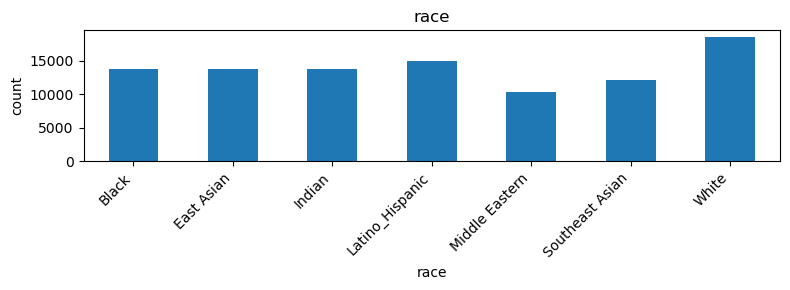

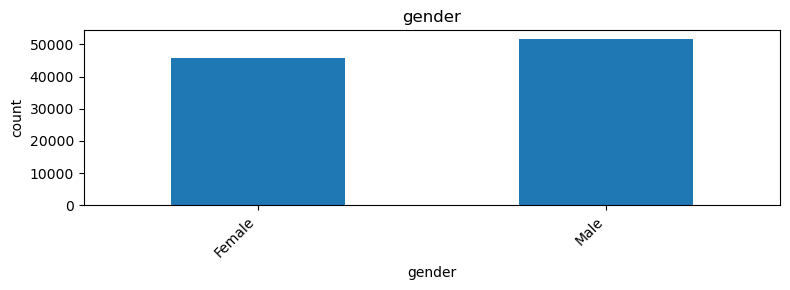

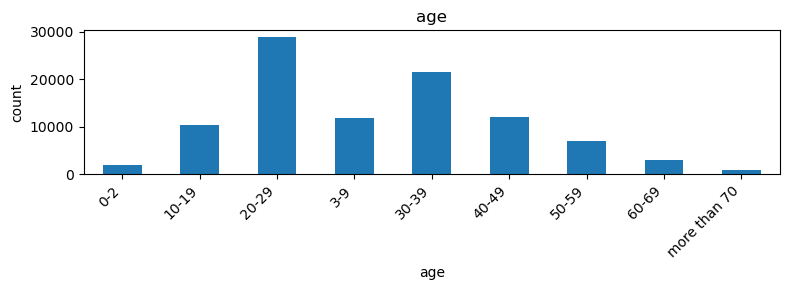

In [5]:
for col in ["race", "gender", "age"]:
    counts = full_df[col].value_counts().sort_index()
    plt.figure(figsize=(8, 3))
    counts.plot(kind="bar")
    plt.title(col)
    plt.ylabel("count")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()
    #for the graphic race we can see that we have 7 ethnics group, but white people are more representated.
    # the gender are almost 50-50 with a little more male
    # the distribution is more concentrated for people around 20-29 and 30-39
    # I have to be aware and pay attention to those because that can lead to biaises.

/tmp/ipykernel_1322/3835079865.py:9: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=min(1000, len(x)), random_state=42))
/tmp/ipykernel_1322/3835079865.py:14: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=min(300, len(x)), random_state=42))


Balanced train size: 7000
race
Black              1000
East Asian         1000
Indian             1000
Latino_Hispanic    1000
Middle Eastern     1000
Southeast Asian    1000
White              1000
Name: count, dtype: int64

Balanced validation size: 2100
race
Black              300
East Asian         300
Indian             300
Latino_Hispanic    300
Middle Eastern     300
Southeast Asian    300
White              300
Name: count, dtype: int64


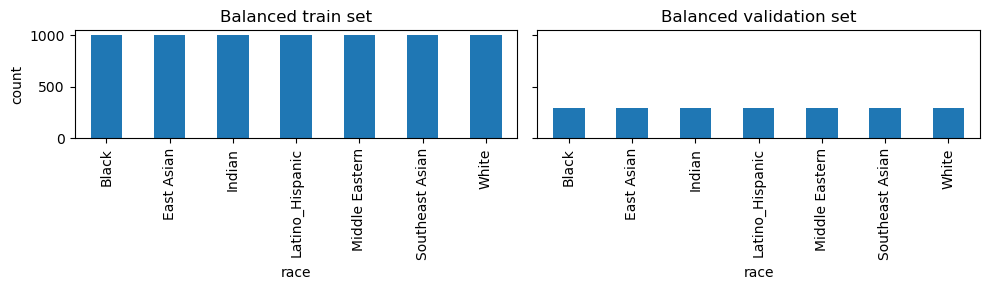

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

train_df = pd.read_csv("./capestone-fairness-audit/data/fairface_full/fairface_label_train.csv")
val_df   = pd.read_csv("./capestone-fairness-audit/data/fairface_full/fairface_label_val.csv")

balanced_train = (
    train_df.groupby("race", group_keys=False)
    .apply(lambda x: x.sample(n=min(1000, len(x)), random_state=42))
)

balanced_val = (
    val_df.groupby("race", group_keys=False)
    .apply(lambda x: x.sample(n=min(300, len(x)), random_state=42))
)

print("Balanced train size:", len(balanced_train))
print(balanced_train["race"].value_counts())
print()
print("Balanced validation size:", len(balanced_val))
print(balanced_val["race"].value_counts())

fig, axes = plt.subplots(1, 2, figsize=(10, 3), sharey=True)

balanced_train["race"].value_counts().sort_index().plot(kind="bar", ax=axes[0])
axes[0].set_title("Balanced train set")
axes[0].set_xlabel("race")
axes[0].set_ylabel("count")

balanced_val["race"].value_counts().sort_index().plot(kind="bar", ax=axes[1])
axes[1].set_title("Balanced validation set")
axes[1].set_xlabel("race")

plt.tight_layout()
plt.show()
# Sample where gender are all equals.

In [ ]:
!git status
!git add notebooks/exploration_fairface.ipynb
!git commit -m "Add FairFace exploration and balanced sampling notebook"
!git push origin main

In [ ]:
cd /files/capestone-fairness-audit

In [ ]:
!git init

In [ ]:
!git add notebooks/exploration_fairface.ipynb
!git commit -m "Add FairFace exploration notebook"
!git push -u origin maiN